# Create Confusion Matrix

In [1]:
import numpy as np
import pandas as pd
import glob
from tensorflow import keras
import pickle
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

2024-04-12 16:13:04.498475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9360] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 16:13:04.498550: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 16:13:04.498587: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1537] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-12 16:13:04.507687: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
#load the model
model = keras.models.load_model("/share/jcorner_data/models/future_modes_v3.h5")

2024-04-12 16:13:54.528092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 16:13:54.532976: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-12 16:13:54.533134: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
#load, normalize, and change data to categorical
with open("/share/jcorner_data/pkls/new_mode_svrimg/svrimg_new_mode_test.pkl", "rb") as f:
    (x_test, y_test) = pickle.load(f)
x_test = x_test.astype("float32") / 80
y_test = keras.utils.to_categorical(y_test, 4)

2024-04-12 16:14:11.567668: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8907


10/10 [==============================] - 1s 19ms/step
Confusion Matrix
[[ 79   4   0   0]
 [  3  61   2   4]
 [  0   3 127   4]
 [  0   0   0  12]]
Classification Report
              precision    recall  f1-score   support

    Cellular       0.96      0.95      0.96        83
  Mixed Mode       0.90      0.87      0.88        70
      Linear       0.98      0.95      0.97       134
       Other       0.60      1.00      0.75        12

    accuracy                           0.93       299
   macro avg       0.86      0.94      0.89       299
weighted avg       0.94      0.93      0.94       299



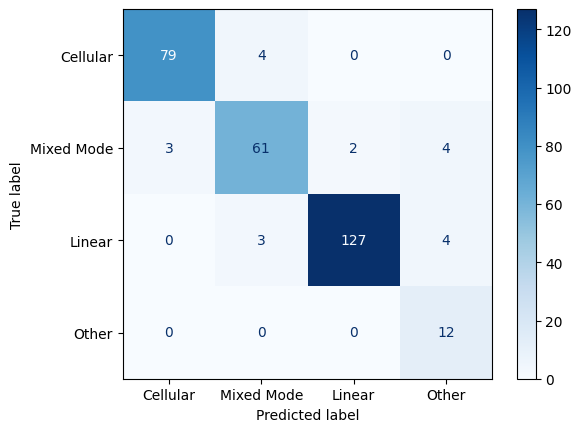

In [6]:
#test the data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_ = np.argmax(y_test, axis=1)

#create the confusion matrix
print('Confusion Matrix')
print(confusion_matrix(y_test_, y_pred))
print('Classification Report')
target_names = ['Cellular', 'Mixed Mode', 'Linear', 'Other']
print(classification_report(y_test_, y_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test_, y_pred), display_labels=target_names)
disp.plot(cmap='Blues')